In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [248]:
loan=pd.read_csv("LoanStats_2019Q1.csv")

/Users/wensun/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,138,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Data Overview

Check structure of the data

In [313]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115679 entries, 0 to 115678
Columns: 144 entries, id to settlement_term
dtypes: float64(114), object(30)
memory usage: 127.1+ MB


In [250]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000.0,20000.0,20000.0,60 months,17.19%,499.10,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,21225.0,21225.0,21225.0,60 months,14.74%,502.05,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,20000.0,20000.0,20000.0,36 months,8.19%,628.49,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,13500.0,13500.0,13500.0,36 months,7.56%,420.31,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
for col in loan.columns:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
b

In [252]:
loan["loan_status"].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Late (16-30 days)', 'Charged Off', nan], dtype=object)

Look at the distribution of loan amounts using bar plot

<AxesSubplot:xlabel='loan_status', ylabel='loan_amount'>

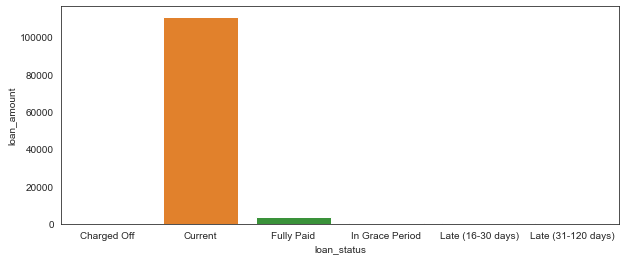

In [466]:
plt.figure(figsize=(10,4))
sns.set_style("white")
df=loan.groupby('loan_status')['loan_amnt'].count().reset_index(name='loan_amount')
sns.barplot(x='loan_status',y='loan_amount',data=df)

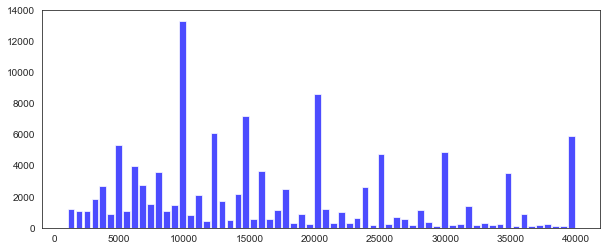

In [459]:
plt.figure(figsize=(10,4))
n,bins,patches=plt.hist(x=loan["loan_amnt"],bins="auto",color='blue',alpha=0.7,rwidth=0.85)
plt.xlabel=("Loan Amount")

combined loan amount across different loan purpose

<AxesSubplot:xlabel='purpose', ylabel='loan_amount'>

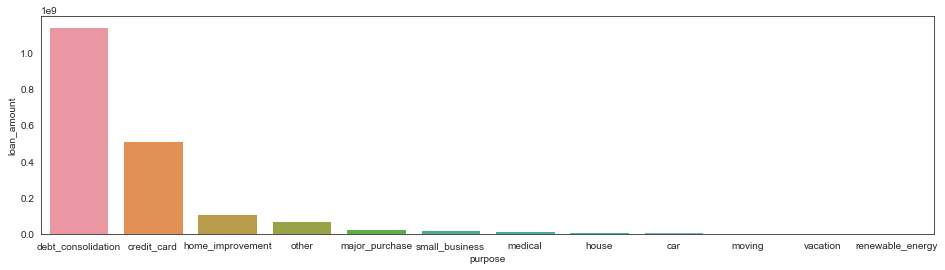

In [471]:
plt.figure(figsize=(16,4))
df1=loan.groupby('purpose')['loan_amnt'].sum().reset_index(name='loan_amount')
sns.barplot(x='purpose',y='loan_amount',data=df1, order=df1.sort_values('loan_amount',ascending=False).purpose,ci=0)

loan amount distribution within each loan category

<AxesSubplot:xlabel='purpose', ylabel='loan_amnt'>

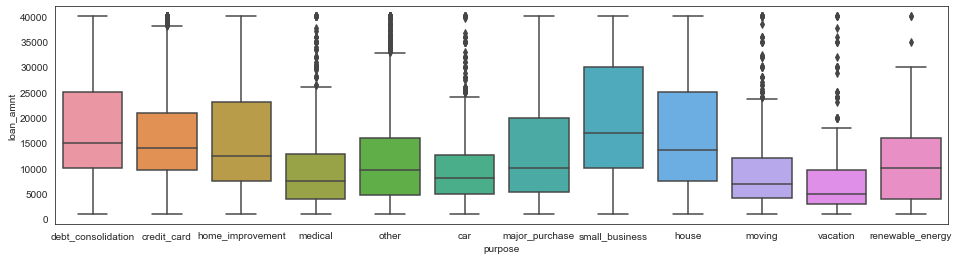

In [256]:
plt.figure(figsize=(16,4))
sns.boxplot(data=loan,x="purpose",y="loan_amnt")

Summary of combined loan amounts across different loan purposes and loan status

In [257]:
loan.pivot_table(index='purpose',columns='loan_status',values='loan_amnt',aggfunc='sum')

loan_status,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
purpose,,,,,,
car,NaN,9.737800e+06,649725.0,18500.0,24800.0,49100.0
credit_card,105350.0,4.981836e+08,11079600.0,1020500.0,915750.0,1562525.0
debt_consolidation,757275.0,1.099742e+09,29955300.0,3544150.0,2208950.0,4936700.0
home_improvement,136800.0,1.023059e+08,3959475.0,382600.0,429750.0,503250.0
house,30000.0,1.135442e+07,888300.0,36400.0,17575.0,123300.0
major_purchase,33000.0,2.573800e+07,1257225.0,155200.0,99900.0,211700.0
medical,5000.0,1.266815e+07,432750.0,47000.0,57500.0,126000.0
moving,7500.0,5.350600e+06,293900.0,62600.0,59600.0,19000.0
other,31500.0,6.683038e+07,3276575.0,350275.0,218425.0,360975.0


number of loans across different loan purposes and loan status

In [258]:
print(pd.crosstab(index=loan["purpose"],columns=loan["loan_status"],margins=True))

loan_status         Charged Off  Current  Fully Paid  In Grace Period  \
purpose                                                                 
car                           0      953          62                3   
credit_card                   5    30754         771               64   
debt_consolidation           64    61235        1856              193   
home_improvement             14     6395         272               23   
house                         3      673          59                3   
major_purchase                4     1803          99                7   
medical                       1     1258          58                5   
moving                        1      525          36                4   
other                         5     5595         312               21   
renewable_energy              0       52           7                0   
small_business                1     1031          31                4   
vacation                      0      644          4

# Data Cleaning

Create a separate set of features that we will work with

In [367]:
loan_sub=loan[["loan_amnt","int_rate","emp_length","annual_inc","loan_status","dti","tax_liens",
"open_acc",'mths_since_last_delinq','purpose','home_ownership']]

In [368]:
loan_sub.head()

,loan_amnt,int_rate,emp_length,annual_inc,loan_status,dti,tax_liens,open_acc,mths_since_last_delinq,purpose,home_ownership
0,20000.0,17.19%,6 years,47000.0,Current,14.02,0.0,15.0,50.0,debt_consolidation,RENT
1,21225.0,14.74%,10+ years,225000.0,Current,16.80,0.0,14.0,NaN,credit_card,MORTGAGE
2,5000.0,17.97%,NaN,62000.0,Current,19.82,0.0,8.0,4.0,home_improvement,MORTGAGE
3,20000.0,8.19%,1 year,200000.0,Current,22.66,0.0,20.0,18.0,credit_card,MORTGAGE
4,13500.0,7.56%,8 years,34860.0,Current,10.91,0.0,9.0,NaN,credit_card,RENT


In [369]:
loan_sub.shape

(115679, 11)

Cleaning:
1. categorize loan status to default and non-default
2. covert emp_length from variable variable to numeric variable
3. drop N/A values from fields
4. transform mths_since_last_delinq to categorical data: had deliquency record in past 36 months v.s. no deliquency record during past 36 months
5. convert int_rate to numeric variable

In [370]:
loan_sub.dropna(subset=['loan_status'],inplace=True)

In [371]:
loan_sub['loan_status']=loan_sub['loan_status'].apply(lambda x: 0 if x=='Fully Paid' or x=='Current' else 1)

In [372]:
loan_sub.reset_index(drop=True, inplace=True)

Text(0, 0.5, '% of loan status')

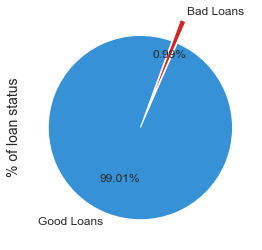

In [373]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
loan_sub["loan_status"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
axes.set_ylabel('% of loan status',fontsize=14)

In [374]:
loan_sub['emp_length'].fillna("0 year",inplace=True)

In [375]:
loan_sub.head()

,loan_amnt,int_rate,emp_length,annual_inc,loan_status,dti,tax_liens,open_acc,mths_since_last_delinq,purpose,home_ownership
0,20000.0,17.19%,6 years,47000.0,0,14.02,0.0,15.0,50.0,debt_consolidation,RENT
1,21225.0,14.74%,10+ years,225000.0,0,16.80,0.0,14.0,NaN,credit_card,MORTGAGE
2,5000.0,17.97%,0 year,62000.0,0,19.82,0.0,8.0,4.0,home_improvement,MORTGAGE
3,20000.0,8.19%,1 year,200000.0,0,22.66,0.0,20.0,18.0,credit_card,MORTGAGE
4,13500.0,7.56%,8 years,34860.0,0,10.91,0.0,9.0,NaN,credit_card,RENT


In [376]:
for i in range(len(loan_sub['emp_length'])):
    if loan_sub['emp_length'][i]=='10+ years':
        loan_sub['emp_length'][i]=10
    elif loan_sub['emp_length'][i]=='< 1 year':
        loan_sub['emp_length'][i]=1
    else:
        loan_sub['emp_length'][i]=loan_sub['emp_length'][i][0]


In [377]:
loan_sub['emp_length']=pd.to_numeric(loan_sub['emp_length'])

In [378]:
loan_sub.head()

,loan_amnt,int_rate,emp_length,annual_inc,loan_status,dti,tax_liens,open_acc,mths_since_last_delinq,purpose,home_ownership
0,20000.0,17.19%,6,47000.0,0,14.02,0.0,15.0,50.0,debt_consolidation,RENT
1,21225.0,14.74%,10,225000.0,0,16.80,0.0,14.0,NaN,credit_card,MORTGAGE
2,5000.0,17.97%,0,62000.0,0,19.82,0.0,8.0,4.0,home_improvement,MORTGAGE
3,20000.0,8.19%,1,200000.0,0,22.66,0.0,20.0,18.0,credit_card,MORTGAGE
4,13500.0,7.56%,8,34860.0,0,10.91,0.0,9.0,NaN,credit_card,RENT


In [379]:
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115675 entries, 0 to 115674
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               115675 non-null  float64
 1   int_rate                115675 non-null  object 
 2   emp_length              115675 non-null  int64  
 3   annual_inc              115675 non-null  float64
 4   loan_status             115675 non-null  int64  
 5   dti                     115418 non-null  float64
 6   tax_liens               115675 non-null  float64
 7   open_acc                115675 non-null  float64
 8   mths_since_last_delinq  49876 non-null   float64
 9   purpose                 115675 non-null  object 
 10  home_ownership          115675 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 9.7+ MB


In [380]:
loan_sub.drop(loan_sub[loan_sub["dti"].isnull()].index,inplace=True)

In [381]:
loan_sub['delinq_last_3_year'] = np.where(loan_sub['mths_since_last_delinq']<36, "Y", "N")

In [382]:
loan_sub.drop('mths_since_last_delinq',axis=1,inplace=True)

In [383]:
loan_sub['int_rate']=loan_sub['int_rate'].str.replace('%','')

In [384]:
loan_sub['int_rate']=pd.to_numeric(loan_sub['int_rate'])

In [385]:
loan_sub.head()

,loan_amnt,int_rate,emp_length,annual_inc,loan_status,dti,tax_liens,open_acc,purpose,home_ownership,delinq_last_3_year
0,20000.0,17.19,6,47000.0,0,14.02,0.0,15.0,debt_consolidation,RENT,N
1,21225.0,14.74,10,225000.0,0,16.80,0.0,14.0,credit_card,MORTGAGE,N
2,5000.0,17.97,0,62000.0,0,19.82,0.0,8.0,home_improvement,MORTGAGE,Y
3,20000.0,8.19,1,200000.0,0,22.66,0.0,20.0,credit_card,MORTGAGE,Y
4,13500.0,7.56,8,34860.0,0,10.91,0.0,9.0,credit_card,RENT,N


In [386]:
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115418 entries, 0 to 115674
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loan_amnt           115418 non-null  float64
 1   int_rate            115418 non-null  float64
 2   emp_length          115418 non-null  int64  
 3   annual_inc          115418 non-null  float64
 4   loan_status         115418 non-null  int64  
 5   dti                 115418 non-null  float64
 6   tax_liens           115418 non-null  float64
 7   open_acc            115418 non-null  float64
 8   purpose             115418 non-null  object 
 9   home_ownership      115418 non-null  object 
 10  delinq_last_3_year  115418 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 10.6+ MB


# Data Preparation - Get dummy variables

In [387]:
df_num=loan_sub.select_dtypes(exclude=['object'])
df_cat=loan_sub.select_dtypes(include=['object'])
df_cat_onehot=pd.get_dummies(df_cat)
loan_final=pd.concat([df_num,df_cat_onehot],axis=1)

In [388]:
loan_final.head()

,loan_amnt,int_rate,emp_length,annual_inc,loan_status,dti,tax_liens,open_acc,purpose_car,purpose_credit_card,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,delinq_last_3_year_N,delinq_last_3_year_Y
0,20000.0,17.19,6,47000.0,0,14.02,0.0,15.0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,21225.0,14.74,10,225000.0,0,16.80,0.0,14.0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,5000.0,17.97,0,62000.0,0,19.82,0.0,8.0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,20000.0,8.19,1,200000.0,0,22.66,0.0,20.0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,13500.0,7.56,8,34860.0,0,10.91,0.0,9.0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [389]:
loan_final['loan_status'].value_counts()

0    114270
1      1148
Name: loan_status, dtype: int64

# Logistic Regression

train a logistic regression

In [390]:
X=loan_final.drop('loan_status',axis=1)
y=loan_final['loan_status']

In [391]:
from sklearn.model_selection import train_test_split

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [393]:
from sklearn.linear_model import LogisticRegression

In [394]:
clf_logistic=LogisticRegression(solver='lbfgs')
clf_logistic.fit(X_train,np.ravel(y_train))

LogisticRegression()

In [395]:
preds=clf_logistic.predict_proba(X_test)
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

assign loan performance prediction based on threshold

In [396]:
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

evaluate model performance

In [397]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,preds_df['loan_status']))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     28584
           1       0.00      0.00      0.00       271

    accuracy                           0.99     28855
   macro avg       0.50      0.50      0.50     28855
weighted avg       0.98      0.99      0.99     28855



/Users/wensun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Undersampling strategy

In [399]:
X_y_train=pd.concat([X_train.reset_index(drop=True),y_train.reset_index(drop=True)],axis=1)
count_nondefault,count_default=X_y_train['loan_status'].value_counts()
nondefaults=X_y_train[X_y_train['loan_status']==0]
defaults=X_y_train[X_y_train['loan_status']==1]
nondefaults_under=nondefaults.sample(count_default)
X_y_train_under=pd.concat([nondefaults_under.reset_index(drop=True),defaults.reset_index(drop=True)],axis=0)

In [400]:
X_under=X_y_train_under.drop('loan_status',axis=1)
y_under=X_y_train_under['loan_status']

In [401]:
clf_logistic.fit(X_under,np.ravel(y_under))
preds=clf_logistic.predict_proba(X_test)
preds_under=pd.DataFrame(preds[:,1], columns = ['prob_default'])

In [425]:
preds_under['loan_status'] = preds_under['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test,preds_under['loan_status']))

              precision    recall  f1-score   support

           0       0.99      0.03      0.07     28584
           1       0.01      0.98      0.02       271

    accuracy                           0.04     28855
   macro avg       0.50      0.51      0.04     28855
weighted avg       0.98      0.04      0.06     28855



# Gradient boosted trees with XGBoost

In [426]:
import xgboost as xgb
clf_gbt=xgb.XGBClassifier(learning_rate=0.2,max_depth=4)

In [427]:
clf_gbt.fit(X_under,np.ravel(y_under))

[15:59:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/wensun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

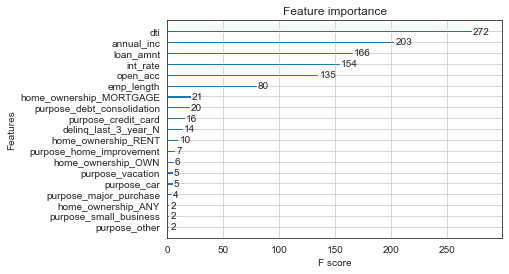

In [428]:
xgb.plot_importance(clf_gbt,importance_type='weight')

In [429]:
preds=clf_gbt.predict_proba(X_test)
xgb_preds=pd.DataFrame(preds[:,1], columns = ['prob_default'])

In [430]:
xgb_preds['pred_loan_status'] = xgb_preds['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

In [431]:
xgb_comparison=pd.concat([y_test.reset_index(drop=True),xgb_preds],axis=1)

In [432]:
xgb_comparison

,loan_status,prob_default,pred_loan_status
0,0,0.382772,0
1,0,0.489294,1
2,0,0.683639,1
3,0,0.641958,1
4,0,0.431400,1
...,...,...,...
28850,0,0.187320,0
28851,0,0.494772,1
28852,0,0.105823,0
28853,0,0.511510,1


In [433]:
xgb_comparison[xgb_comparison['loan_status']==1]['pred_loan_status'].value_counts()

1    199
0     72
Name: pred_loan_status, dtype: int64

In [434]:
print(classification_report(y_test,xgb_preds['pred_loan_status']))

              precision    recall  f1-score   support

           0       0.99      0.50      0.67     28584
           1       0.01      0.73      0.03       271

    accuracy                           0.50     28855
   macro avg       0.50      0.62      0.35     28855
weighted avg       0.99      0.50      0.66     28855



# Set up strategy table

In [435]:
accept_rates=[1.0,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1]
thresholds=[]
bad_rates=[]

In [436]:
for rate in accept_rates:
    thres=np.quantile(xgb_comparison['prob_default'],rate).round(3)
    thresholds.append(np.quantile(xgb_comparison['prob_default'],rate).round(3))
    xgb_comparison['pred_loan_status']=xgb_comparison['prob_default'].apply(lambda x:1 if x > thres else 0)
    accepted_loans = xgb_comparison[xgb_comparison['pred_loan_status'] == 0]
    
    bad_rates.append(np.sum((accepted_loans['loan_status']) / len(accepted_loans['loan_status'])).round(3))

In [437]:
pd.DataFrame({'accept_rates':accept_rates,'thresholds':thresholds, 'bad_rates':bad_rates})

,accept_rates,thresholds,bad_rates
0,1.00,0.997,0.009
1,0.95,0.834,0.009
2,0.90,0.746,0.008
3,0.85,0.682,0.008
4,0.80,0.627,0.007
5,0.75,0.579,0.007
6,0.70,0.536,0.006
7,0.65,0.499,0.006
8,0.60,0.464,0.006
9,0.55,0.433,0.005
